In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats

In [2]:
day_data = pd.read_csv(r'F:\bike_dataset\day.csv')
hour_data = pd.read_csv(r'F:\bike_dataset\hour.csv')

In [3]:
print("Day data sample:")
print(day_data.head())
print("\nHour data sample:")
print(hour_data.head())

Day data sample:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  

Hour dat

In [4]:
print("\nDay data columns:", day_data.columns)
print("Hour data columns:", hour_data.columns)


Day data columns: Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
Hour data columns: Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')


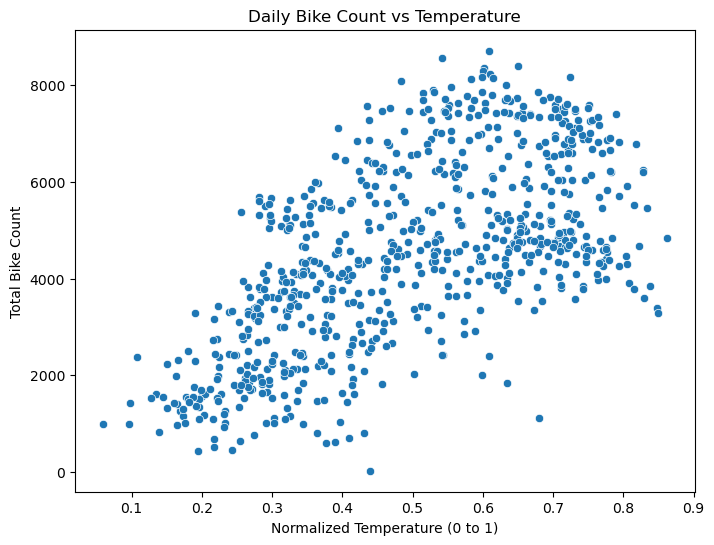

In [5]:
# EDA: Plot daily bike count vs temperature (assuming 'temp' and 'cnt' columns exist)
plt.figure(figsize=(8,6))
sns.scatterplot(x='temp', y='cnt', data=day_data)
plt.title('Daily Bike Count vs Temperature')
plt.xlabel('Normalized Temperature (0 to 1)')
plt.ylabel('Total Bike Count')
plt.show()

In [6]:
day_data['is_rain'] = day_data['weathersit'].apply(lambda x: 1 if x >= 3 else 0)

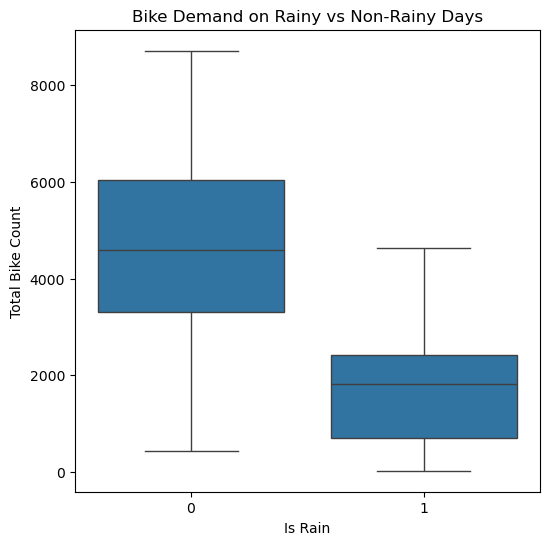

In [7]:
# Boxplot: Bike demand on rainy vs non-rainy days
plt.figure(figsize=(6,6))
sns.boxplot(x='is_rain', y='cnt', data=day_data)
plt.title('Bike Demand on Rainy vs Non-Rainy Days')
plt.xlabel('Is Rain')
plt.ylabel('Total Bike Count')
plt.show()


In [8]:
# Correlation matrix
weather_cols = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
corr = day_data[weather_cols].corr()
print("\nCorrelation matrix:")
print(corr)



Correlation matrix:
               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.991702  0.126963  -0.157944  0.627494
atemp      0.991702  1.000000  0.139988  -0.183643  0.631066
hum        0.126963  0.139988  1.000000  -0.248489 -0.100659
windspeed -0.157944 -0.183643 -0.248489   1.000000 -0.234545
cnt        0.627494  0.631066 -0.100659  -0.234545  1.000000


In [9]:
# T-test to see if bike counts differ significantly on rainy vs non-rainy days
rainy_counts = day_data[day_data['is_rain'] == 1]['cnt']
non_rainy_counts = day_data[day_data['is_rain'] == 0]['cnt']
t_stat, p_val = stats.ttest_ind(rainy_counts, non_rainy_counts)
print(f"\nT-test between rainy and non-rainy days bike counts: t-stat={t_stat:.3f}, p-value={p_val:.3f}")


T-test between rainy and non-rainy days bike counts: t-stat=-6.674, p-value=0.000


In [10]:
# Simple Linear Regression predicting bike count based on weather variables
X = day_data[['temp', 'hum', 'windspeed']]
y = day_data['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [11]:
print(f"\nRegression RMSE: {mean_squared_error(y_test, y_pred, squared=False):.2f}")
print(f"Regression R2 score: {r2_score(y_test, y_pred):.2f}")



Regression RMSE: 1421.52
Regression R2 score: 0.50


C:\Users\ACER\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [12]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nRegression Coefficients:")
print(coefficients)


Regression Coefficients:
     Feature  Coefficient
0       temp  6589.714925
1        hum -2995.743977
2  windspeed -4153.013878
